<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week12_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

### Face detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (1,937 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
import os
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
from IPython.display import display, Javascript

# Mengecek keberadaan file cascade untuk deteksi wajah
cascade_file = '/content/drive/MyDrive/pcvk/Face Detection/haarcascade_frontalface_alt.xml'
print(f"Cascade file exists: {os.path.exists(cascade_file)}")

# Fungsi untuk mendeteksi wajah pada gambar
def detect_faces(image_file):
    # Load file Haar Cascade
    face_cascade = cv2.CascadeClassifier(cascade_file)

    # Membaca gambar dan mengubahnya menjadi grayscale
    img = cv2.imread(image_file)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(gray_img)

    # Salin gambar asli untuk menggambar persegi
    detected_img = img.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(detected_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Konversi BGR ke RGB untuk tampilan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_img_rgb = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

    return img_rgb, detected_img_rgb

# Fungsi untuk menampilkan gambar asli dan gambar hasil deteksi
def display_images(original, detected):
    plt.figure(figsize=(12, 6))

    # Plot gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Gambar Asli")
    plt.axis("off")

    # Plot gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(detected)
    plt.title("Gambar dengan Deteksi Wajah")
    plt.axis("off")

    plt.show()

Cascade file exists: True


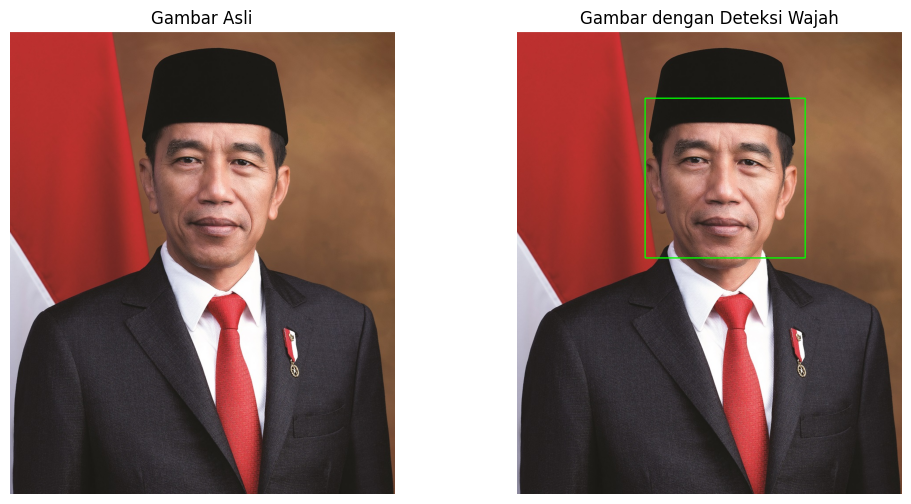

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/jokowi.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

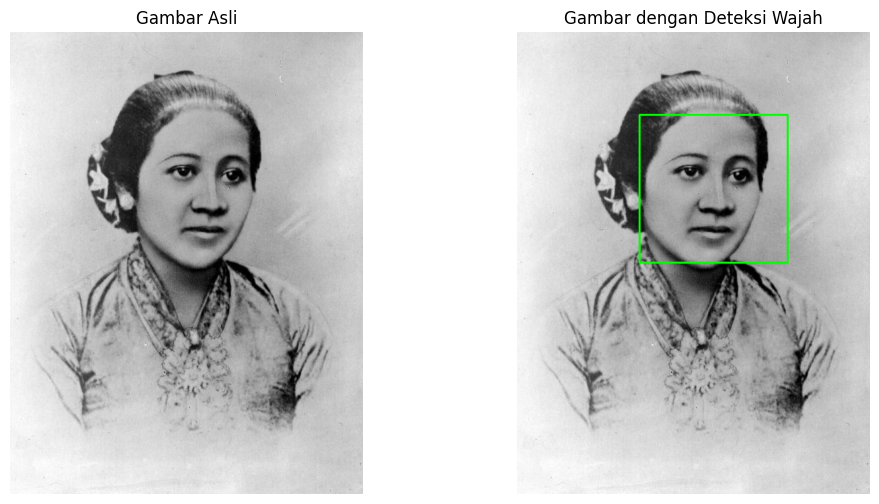

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/kartini.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

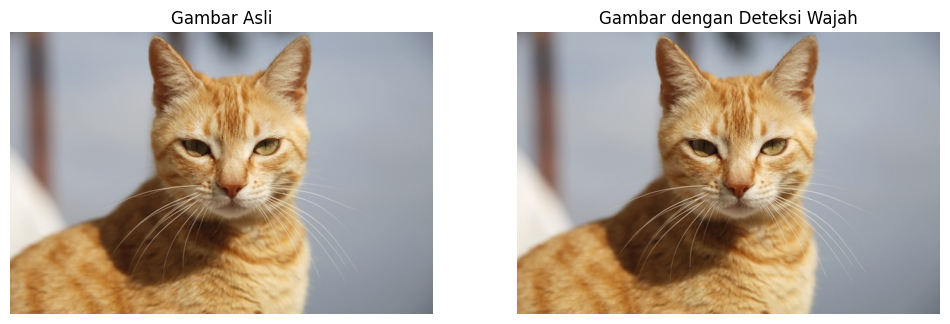

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/mycat.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

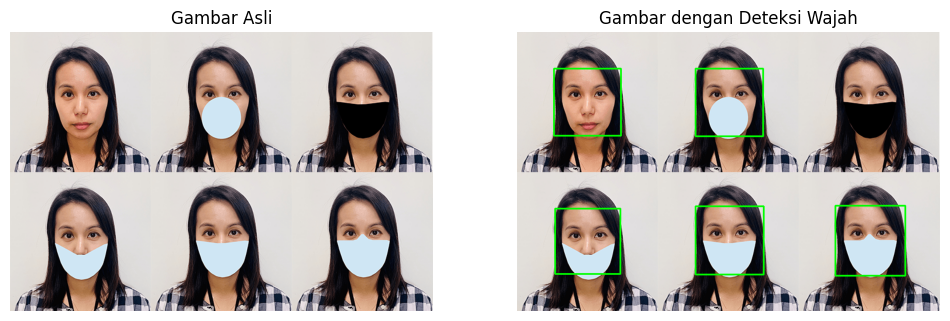

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/mask.png')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

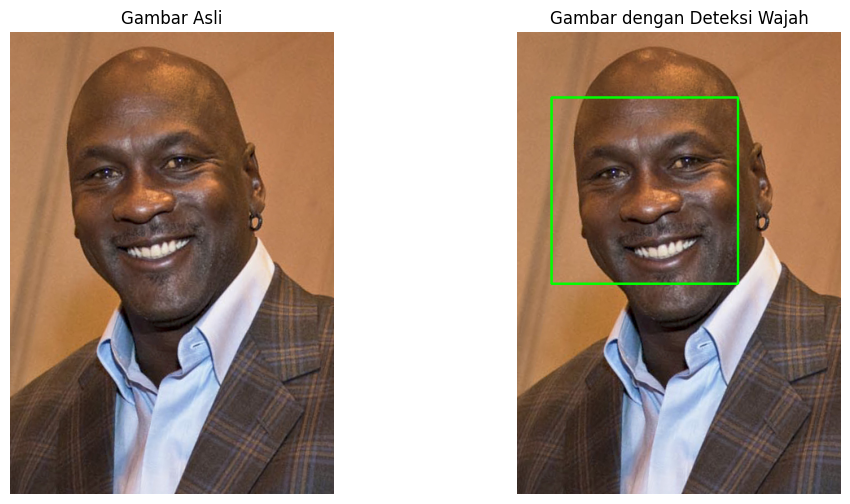

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/mjordan.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

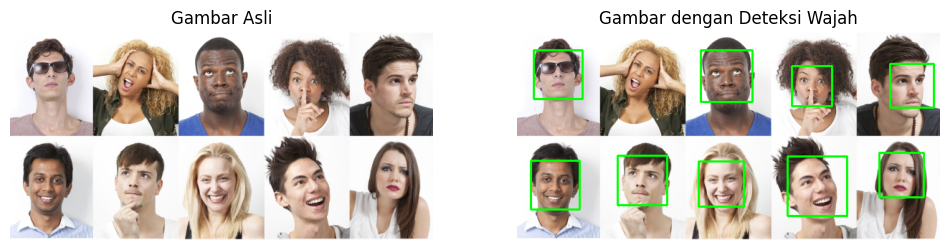

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/people.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

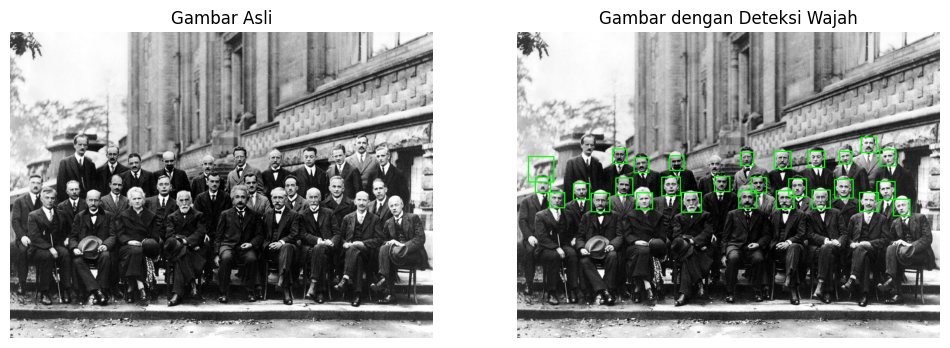

In [ ]:
original_img, detected_faces_img = detect_faces('/content/drive/MyDrive/pcvk/Face Detection/solvayconf.jpg')

# Tampilkan hasil deteksi
display_images(original_img, detected_faces_img)

### Lakukan deteksi wajah kucing

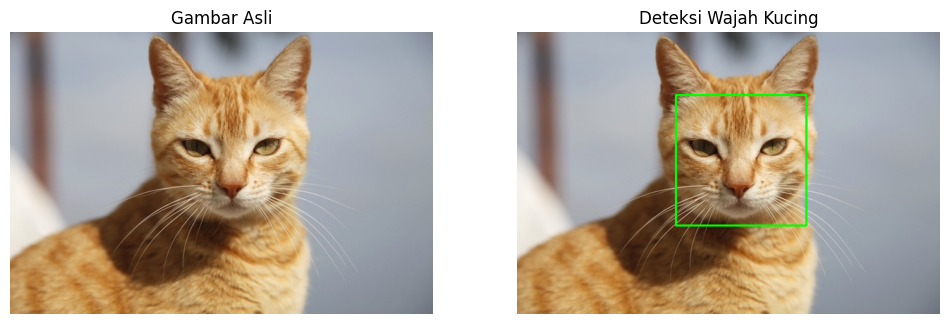

In [ ]:
# Fungsi untuk mendeteksi wajah kucing dalam gambar
def detect_feline_face(img_path):
    # Load Haar Cascade untuk wajah kucing
    feline_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/pcvk/Face Detection/haarcascade_frontalcatface.xml')

    # Membaca gambar dan mengubah ke grayscale
    img = cv2.imread(img_path)
    img_copy = img.copy()
    gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah kucing
    cat_faces = feline_cascade.detectMultiScale(gray_img, scaleFactor=1.15, minNeighbors=5, minSize=(80, 80))

    # Gambar persegi pada area wajah kucing
    for (x, y, w, h) in cat_faces:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Konversi gambar ke RGB
    rgb_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb_detected = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    return rgb_original, rgb_detected

# Fungsi untuk menampilkan gambar asli dan hasil deteksi
def show_feline_detection(original, detected):
    plt.figure(figsize=(12, 6))

    # Plot gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Gambar Asli")
    plt.axis('off')

    # Plot gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(detected)
    plt.title("Deteksi Wajah Kucing")
    plt.axis('off')

    plt.show()

# Jalankan deteksi wajah kucing pada gambar
original_img, detected_cat_img = detect_feline_face('/content/drive/MyDrive/pcvk/Face Detection/mycat.jpg')

# Tampilkan hasil deteksi
show_feline_detection(original_img, detected_cat_img)


###  Cobakan juga untuk eyes detection

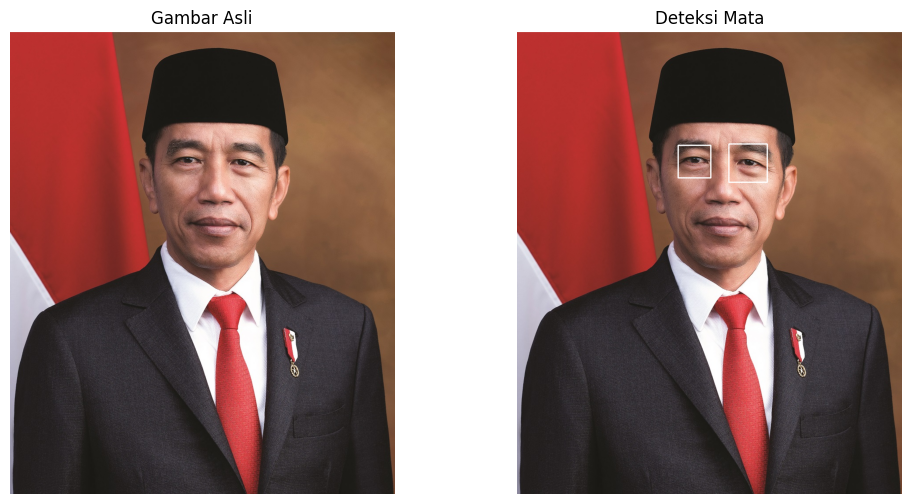

In [ ]:
# Fungsi untuk mendeteksi mata dalam gambar
def detect_eyes(img_path):
    # Path ke file Haar Cascade untuk deteksi mata
    haar_eye_path = '/content/drive/MyDrive/pcvk/Face Detection/haarcascade_eye.xml'
    eye_cascade = cv2.CascadeClassifier(haar_eye_path)

    # Baca gambar dan ubah ke grayscale
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi mata
    detected_eyes = eye_cascade.detectMultiScale(img_gray)

    # Buat salinan gambar asli untuk menggambar kotak
    img_with_boxes = img.copy()
    for (x, y, w, h) in detected_eyes:
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (255, 255, 255), 2)

    # Konversi gambar ke RGB
    rgb_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb_eyes_detected = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    return rgb_original, rgb_eyes_detected

# Deteksi mata dalam gambar
original_img, eyes_detected_img = detect_eyes('/content/drive/MyDrive/pcvk/Face Detection/jokowi.jpg')

# Plot gambar asli dan gambar hasil deteksi
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(original_img)
plt.axis('off')

# Gambar hasil deteksi mata
plt.subplot(1, 2, 2)
plt.title("Deteksi Mata")
plt.imshow(eyes_detected_img)
plt.axis('off')

plt.show()

###  Lakukan Face Tracking menggunakan Google Colab


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


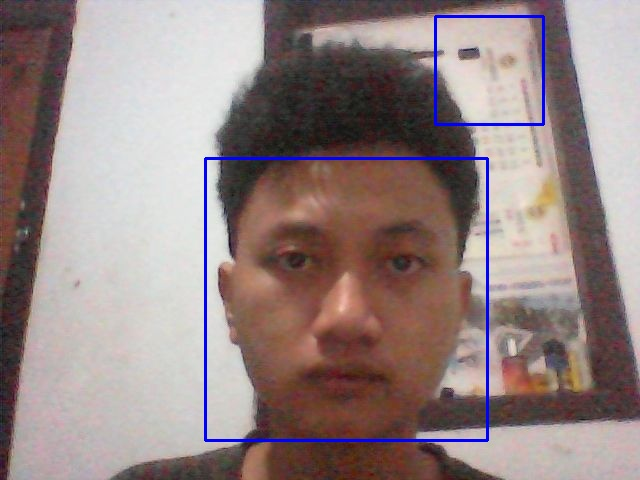

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

### Lakukan Blurring pada bagian wajah yang terdeteksi

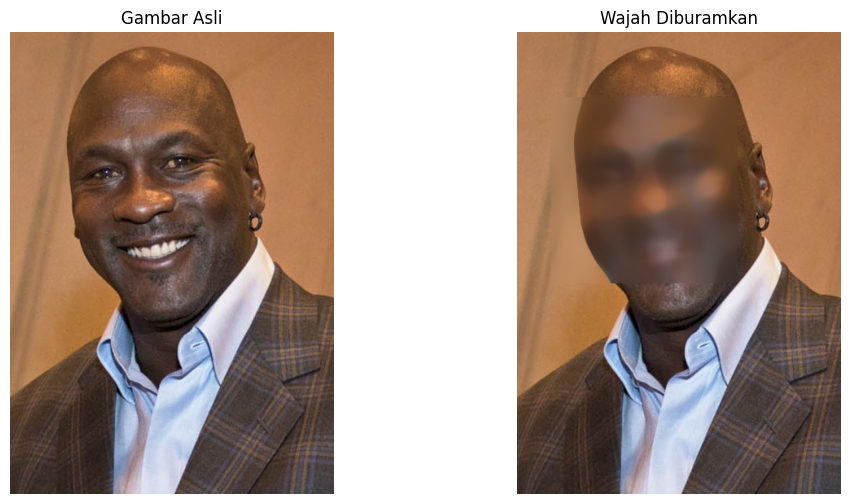

In [ ]:
# Fungsi untuk mendeteksi dan memburamkan wajah
def blur_faces(img_path):
    # Path ke Haar Cascade untuk deteksi wajah
    haarcascade_path = '/content/drive/MyDrive/pcvk/Face Detection/haarcascade_frontalface_alt.xml'
    face_cascade = cv2.CascadeClassifier(haarcascade_path)

    # Membaca gambar dan mengonversi ke grayscale
    img = cv2.imread(img_path)
    img_copy = img.copy()
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Deteksi area wajah
    detected_faces = face_cascade.detectMultiScale(gray_img)

    # Memburamkan wajah yang terdeteksi
    for (x, y, w, h) in detected_faces:
        face_region = img_copy[y:y+h, x:x+w]
        blurred_face = cv2.medianBlur(face_region, 35)
        img_copy[y:y+h, x:x+w] = blurred_face

    # Konversi gambar ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blurred_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    return img_rgb, blurred_img

# Fungsi untuk menampilkan gambar asli dan gambar dengan wajah diburamkan
def display_blurred_faces(original_img, blurred_img):
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Gambar Asli")
    plt.imshow(original_img)
    plt.axis('off')

    # Gambar dengan wajah diburamkan
    plt.subplot(1, 2, 2)
    plt.title("Wajah Diburamkan")
    plt.imshow(blurred_img)
    plt.axis('off')

    plt.show()

# Eksekusi fungsi deteksi dan pemburaman wajah
original_img, blurred_img = blur_faces('/content/drive/MyDrive/pcvk/Face Detection/mjordan.jpg')

# Tampilkan hasil
display_blurred_faces(original_img, blurred_img)

###  Lakukan segmentasi karakter pada KTP seperti gambar berikut

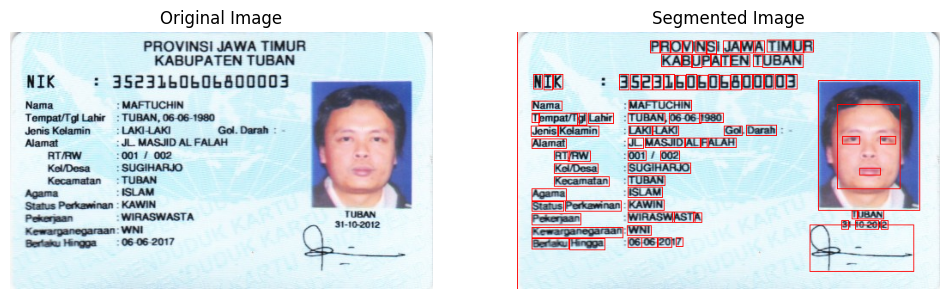

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

def detect_ktp_characters(image_path):
    """
    Mendeteksi karakter pada gambar KTP dengan menggunakan deteksi kontur.

    Parameters:
    - image_path (str): Path menuju file gambar KTP.

    Returns:
    - processed_img (numpy.ndarray): Gambar dengan area karakter ditandai dalam format RGB.
    """
    # Membaca gambar dan menerapkan Gaussian Blur
    img_ktp = cv.imread(image_path)
    blurred_img = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

    # Mengonversi gambar ke grayscale
    gray_img = cv.cvtColor(blurred_img, cv.COLOR_BGR2GRAY)

    # Thresholding menggunakan metode Otsu
    _, binary_img = cv.threshold(gray_img.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Melakukan erosi pada gambar biner
    eroded_img = cv.erode(binary_img.copy(), cv.getStructuringElement(cv.MORPH_RECT, (1, 1)))

    # Menyalin gambar asli untuk menggambar hasil
    result_img = img_ktp.copy()

    # Mendeteksi kontur pada gambar hasil erosi
    contours, _ = cv.findContours(eroded_img.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    # Iterasi melalui setiap kontur
    for contour in contours:
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = float(w) / h  # Rasio aspek

        # Kondisi untuk mendeteksi karakter berdasarkan ukuran dan rasio
        if h >= 40 and w >= 10 and aspect_ratio <= 1:
            cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        elif h >= 8 and w >= 8 and aspect_ratio <= 10:
            cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
        elif h >= 10 and w >= 7 and aspect_ratio <= 8:
            cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

    # Mengonversi gambar hasil ke RGB untuk visualisasi
    processed_img = cv.cvtColor(result_img, cv.COLOR_BGR2RGB)

    return processed_img

def display_segmentation_result(image_path):
    """
    Menampilkan hasil segmentasi karakter pada gambar KTP.

    Parameters:
    - image_path (str): Path menuju file gambar KTP.
    """
    # Mendapatkan hasil segmentasi
    segmented_img = detect_ktp_characters(image_path)

    # Menampilkan gambar asli dan hasil segmentasi
    original_img = cv.imread(image_path)
    original_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 6))

    # Menampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_img)
    plt.axis('off')

    # Menampilkan gambar hasil segmentasi
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_img)
    plt.axis('off')

    plt.show()

# Contoh penggunaan
ktp_path = '/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp3.png'
display_segmentation_result(ktp_path)

### Lakukan cropping pada bagian NIK

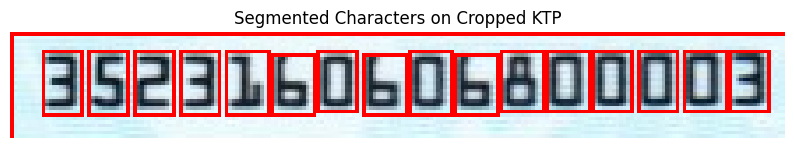

In [ ]:
# Path ke file gambar KTP
ktp_image_path = '/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp3.png'

# Membaca gambar
original_img = cv.imread(ktp_image_path)

# Memotong area tertentu dari gambar
cropped_ktp = original_img[45:75, 110:330]

# Mengaburkan gambar menggunakan Gaussian Blur
blurred_ktp = cv.GaussianBlur(cropped_ktp, (5, 5), 0.5)

# Mengonversi gambar ke grayscale
gray_ktp = cv.cvtColor(blurred_ktp, cv.COLOR_BGR2GRAY)

# Melakukan thresholding dengan metode Otsu
_, binary_ktp = cv.threshold(gray_ktp.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi pada gambar biner
eroded_ktp = cv.erode(binary_ktp.copy(), cv.getStructuringElement(cv.MORPH_RECT, (1, 1)))

# Menyalin gambar untuk menggambar hasil
result_img = cropped_ktp.copy()

# Menemukan kontur pada gambar hasil erosi
contours, _ = cv.findContours(eroded_ktp.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Iterasi melalui setiap kontur yang ditemukan
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = float(w) / h  # Rasio aspek dalam format desimal

    # Mendeteksi karakter berdasarkan ukuran dan rasio
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan hasil segmentasi karakter
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Segmented Characters on Cropped KTP")
plt.show()

### menggunakan Deep Learning untuk melakukan pengenalan karakter

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Melakukan Training Data

In [ ]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    ZeroPadding2D,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
)
from tensorflow.keras.optimizers import Adam

# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

# Normalize data if not already normalized
X = X / 255.0

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation="relu")(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation="relu")(flaten)
fc_layer = Dense(64, activation="relu")(fc_layer)

# Output layer
outputs = Dense(10, activation="softmax")(fc_layer)

# Compile the model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X, Y, epochs=20, verbose=1)

# Save the model in .keras format (recommended) or .h5
model.save("anpr.keras")  # Format native Keras
# model.save("anpr.h5")    # Format HDF5 (opsional)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1825 - loss: 2.2827
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4650 - loss: 2.1789
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5673 - loss: 1.8567
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6860 - loss: 1.2087
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7636 - loss: 0.7915
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8191 - loss: 0.5968
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8627 - loss: 0.4886
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8619 - loss: 0.4624
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8674 - loss: 0.4333
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8845 - loss: 0.3664
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8990 - loss: 0.3449
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy:

### Testing Data

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9605 - loss: 0.1701
Accuracy on the test set: 95.10%


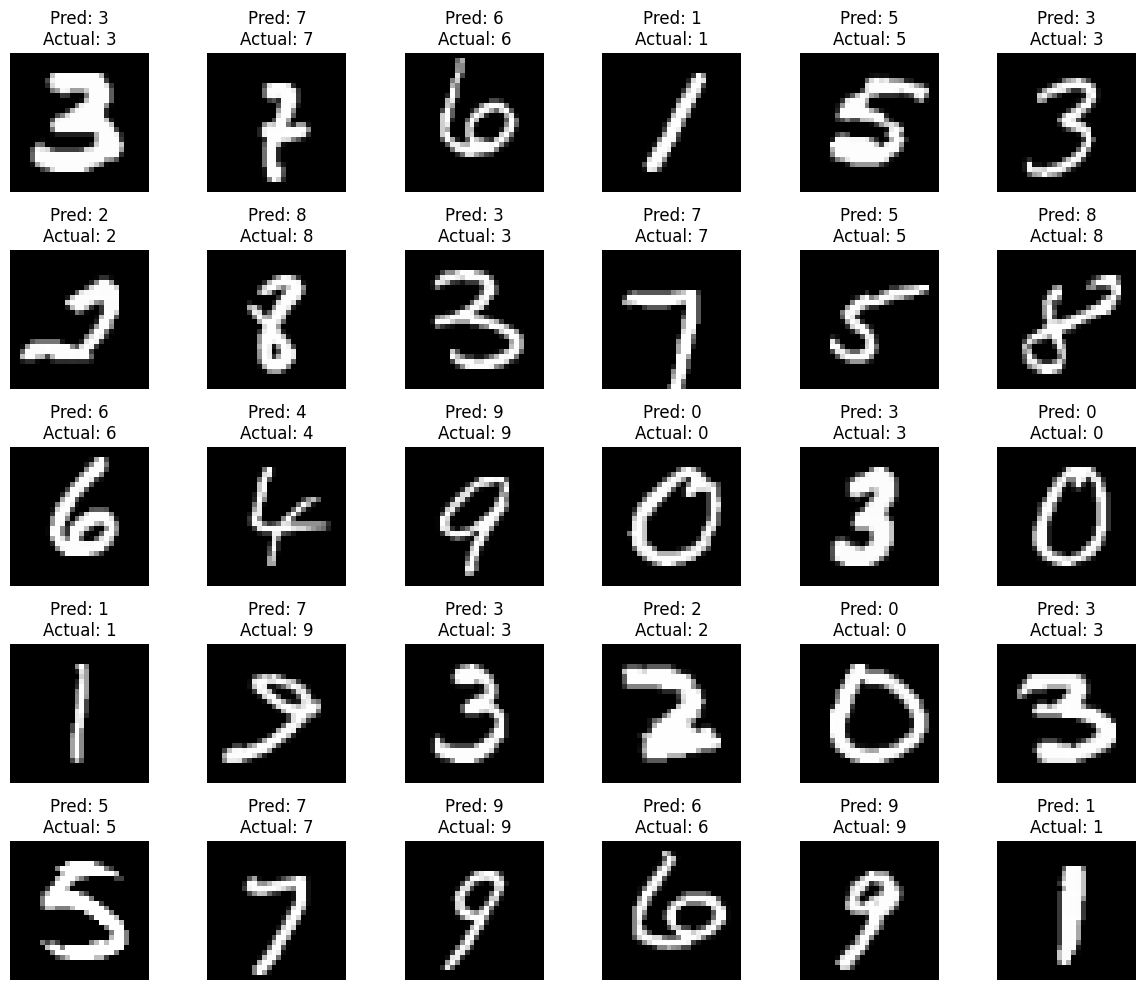

In [ ]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.keras")  # Perbaiki dengan nama file model yang benar

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Mengasumsikan gambar berukuran 28x28 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

### Tugas

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


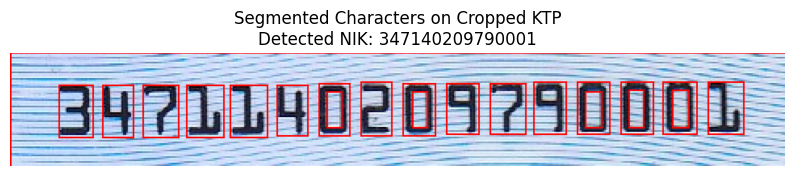

Detected NIK: 347140209790001


In [78]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt
import re

# Path ke file gambar KTP
ktp_image_path = '/content/drive/MyDrive/pcvk/Object Detection/KTP_More/ktp.png'

# Membaca gambar
original_img = cv.imread(ktp_image_path)

# Memotong area tertentu dari gambar
cropped_ktp = original_img[120:190, 220:700]

# Mengaburkan gambar menggunakan Gaussian Blur
blurred_ktp = cv.GaussianBlur(cropped_ktp, (5, 5), 0.5)

# Mengonversi gambar ke grayscale
gray_ktp = cv.cvtColor(blurred_ktp, cv.COLOR_BGR2GRAY)

# Melakukan thresholding dengan metode Otsu
_, binary_ktp = cv.threshold(gray_ktp.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Melakukan erosi pada gambar biner
eroded_ktp = cv.erode(binary_ktp.copy(), cv.getStructuringElement(cv.MORPH_RECT, (1, 1)))

# Menyalin gambar untuk menggambar hasil
result_img = cropped_ktp.copy()

# Menemukan kontur pada gambar hasil erosi
contours, _ = cv.findContours(eroded_ktp.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Iterasi melalui setiap kontur yang ditemukan
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = float(w) / h  # Rasio aspek dalam format desimal

    # Mendeteksi karakter berdasarkan ukuran dan rasio
    if h >= 40 and w >= 10 and aspect_ratio <= 1:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and aspect_ratio <= 10:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and aspect_ratio <= 8:
        cv.rectangle(result_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menggunakan pytesseract untuk mengekstrak teks dari gambar tersegmentasi
# Konfigurasi untuk memastikan OCR lebih fokus pada angka
nik_text = pytesseract.image_to_string(eroded_ktp, config='--psm 6 --oem 3')

# Filter hasil OCR untuk hanya mengambil angka (menggunakan regex)
nik_text = re.sub(r'[^0-9]', '', nik_text)

# Menampilkan hasil segmentasi karakter dan nilai NIK yang tersegmentasi
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Segmented Characters on Cropped KTP\nDetected NIK: " + nik_text)
plt.show()

# Menampilkan nilai NIK yang terdeteksi
print("Detected NIK:", nik_text)